In [2]:
!pip install -q pyLDAvis==2.1.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import time
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import pickle
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [4]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-6-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [7]:
data  = pd.read_csv("/content/drive/MyDrive/Second year/Project Text Mining/yelp_dataset/data_preprocessed3.csv")

In [8]:
data.shape

(570438, 11)

In [9]:
data.head(1)

,Unnamed: 0,Unnamed: 0.1,review_id,user_id,business_id,text,category,n_classes,token,lemma,lemma_text
0,0,0,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,"locals recommended milktooth, and it's an amazing jewel of indianapolis. i'm glade i had the chance to experience this.","['Beer', 'Wine & Spirits', 'Cafes', 'Coffee & Tea', 'Restaurants', 'Food', 'Breakfast & Brunch', 'American (New)']",8,locals recommended milktooth amazing jewel indianapolis glade chance experience,local recommend milktooth amazing jewel indianapolis grade chance experience,"['local', 'recommended', 'milktooth', 'amazing', 'jewel', 'indianapolis', 'glade', 'chance', 'experience']"


In [10]:
data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'lemma_text'])

In [11]:
data.head(1)

,review_id,user_id,business_id,text,category,n_classes,token,lemma
0,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,"locals recommended milktooth, and it's an amazing jewel of indianapolis. i'm glade i had the chance to experience this.","['Beer', 'Wine & Spirits', 'Cafes', 'Coffee & Tea', 'Restaurants', 'Food', 'Breakfast & Brunch', 'American (New)']",8,locals recommended milktooth amazing jewel indianapolis glade chance experience,local recommend milktooth amazing jewel indianapolis grade chance experience


In [ ]:
data_lemmatized =  list(data.lemma.str.split()) #corpus

In [ ]:
data_lemmatized[0]

['local',
 'recommend',
 'milktooth',
 'amazing',
 'jewel',
 'indianapolis',
 'glade',
 'chance',
 'experience']

#### **Wordcloud** for all the documents

In [ ]:
text = " ".join(review for review in data.lemma)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

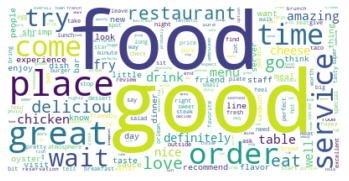

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Topic Modeling**

In [ ]:
# Create Corpus
texts = data_lemmatized

In [ ]:
dictionary = corpora.Dictionary(texts) #creating dictionary
dictionary.filter_extremes(no_below=50, no_above=0.5) #filtering too rare and too frequent words


In [ ]:
# Term Document Frequency 
corpus = [dictionary.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


In [ ]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('amazing', 1),
  ('chance', 1),
  ('experience', 1),
  ('indianapolis', 1),
  ('jewel', 1),
  ('local', 1),
  ('milktooth', 1),
  ('recommend', 1)]]

#### Build the model - **Latent Dirichlet Allocation** (LDA)

LDA, number of topics k = 20

In [ ]:
n_topics = 20 

In [ ]:
# Build LDA model
%%time
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics= n_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto')

CPU times: user 25min 39s, sys: 12.2 s, total: 25min 51s
Wall time: 26min 21s


In [ ]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.047*"seafood" + 0.043*"crab" + 0.039*"beach" + 0.037*"view" + '
  '0.033*"lobster" + 0.027*"soup" + 0.022*"blue" + 0.021*"onion" + 0.021*"dog" '
  '+ 0.021*"art"'),
 (1,
  '0.151*"donut" + 0.064*"flavorful" + 0.045*"crawfish" + 0.034*"cajun" + '
  '0.029*"healthy" + 0.028*"belly" + 0.022*"beat" + 0.021*"risotto" + '
  '0.018*"praline" + 0.017*"delightful"'),
 (2,
  '0.172*"food" + 0.169*"good" + 0.076*"service" + 0.055*"restaurant" + '
  '0.054*"eat" + 0.032*"well" + 0.028*"pretty" + 0.023*"price" + 0.021*"star" '
  '+ 0.017*"excellent"'),
 (3,
  '0.106*"hot" + 0.048*"quickly" + 0.045*"manager" + 0.029*"real" + '
  '0.020*"simple" + 0.019*"tea" + 0.019*"despite" + 0.018*"single" + '
  '0.018*"th" + 0.018*"reno"'),
 (4,
  '0.136*"tour" + 0.048*"guide" + 0.045*"datz" + 0.036*"pasta" + '
  '0.033*"history" + 0.032*"drive" + 0.026*"exhibit" + 0.022*"cheesecake" + '
  '0.021*"oak" + 0.021*"creole"'),
 (5,
  '0.098*"breakfast" + 0.078*"sweet" + 0.072*"egg" + 0.055*"potato" + '
  '0

In [ ]:
import pickle #save the model
pickle.dump(lda_model, open("drive/My Drive/Second year/Project Text Mining/yelp_dataset/lda_model.pkl", "wb")) #topics = 20


In [ ]:
#reload the model
#lda_model = pickle.load(open("drive/My Drive/Second year/Project Text Mining/yelp_dataset/lda_model.pkl", "rb"))

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better. /-0.7 con topics 10




Perplexity:  -7.386924941162467


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v') #coherence 4 con topics 10
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.39120899505160883


In [ ]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, mds='tsne')

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be sq

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7     -10.878068   10.538728   1       1        17.340210
17    -60.884026  -75.591820   2       1        15.232970
6     -2.336119   -53.289074   3       1        11.122135
2     -61.385319  -12.914634   4       1        9.613668 
14    -28.737743   126.296997  5       1        8.277588 
16     1.066606   -123.552811  6       1        5.521986 
12     45.140720  -7.947869    7       1        3.302562 
11    -140.795975 -98.530548   8       1        3.235013 
13     61.531681  -83.240562   9       1        3.061605 
19    -72.563057  -140.396881  10      1        2.905984 
9      15.984491   63.578186   11      1        2.682199 
15    -160.851624  68.945145   12      1        2.665131 
10     85.961830   51.922935   13      1        2.622270 
5     -99.020836   109.936348  14      1        2.584435 
0     -176.764130 -8.681684    15      1        2.306094 
8     -117.189880 -37.420200   16      1        1.902458 
3      108.829918 -22.946203   17      1        1.771980 
18     47.588097   121.934814  18      1        1.578783 
4     -106.467834  30.176889   19      1        1.157204 
1     -50.613804   59.328842   20      1        1.115725 , topic_info=            Term           Freq          Total Category  logprob  loglift
32     food       413265.000000  413265.000000  Default  30.0000  30.0000
95     good       406075.000000  406075.000000  Default  29.0000  29.0000
35     place      315078.000000  315078.000000  Default  28.0000  28.0000
176    order      234410.000000  234410.000000  Default  27.0000  27.0000
163    great      259225.000000  259225.000000  Default  26.0000  26.0000
...      ...                ...            ...      ...      ...      ...
1225   balanced   2171.557588    2172.478246    Topic20 -4.8556   4.4952 
2831   pistachio  2135.824843    2136.745501    Topic20 -4.8722   4.4952 
2850   snapper    2121.777692    2122.698349    Topic20 -4.8788   4.4952 
2660   iced       1985.929976    1986.850633    Topic20 -4.9449   4.4952 
11389  rtm        2459.655327    2470.809488    Topic20 -4.7310   4.4911 

[661 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2456  19     0.999763  absolute   
668   2      0.999984  absolutely 
1718  6      0.999894  accommodate
799   5      0.999969  add        
2152  16     0.999785  adult      
...  ..           ...  ...        
779   10     0.999933  wrong      
691   10     0.999667  yeah       
593   1      0.999979  year       
940   3      0.999930  yes        
780   10     0.999909  yum        

[719 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 18, 7, 3, 15, 17, 13, 12, 14, 20, 10, 16, 11, 6, 1, 9, 4, 19, 5, 2])

### Inspection of the results, k = 20

In [ ]:
tm_results = lda_model[corpus]

In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in lda_model.show_topic(n, topn=20)] for n in range(0, lda_model.num_topics)]

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
Term1,seafood,donut,food,hot,tour,breakfast,order,like,parking,cream,new,chicken,old,spicy,fry,vegan,drink,place,biscuit,sandwich
Term2,crab,flavorful,good,quickly,guide,sweet,come,go,room,ice,french,dish,offer,fill,meal,free,hour,great,beer,ask
Term3,beach,crawfish,service,manager,datz,egg,time,menu,stay,shrimp,orleans,sauce,family,chip,flavor,style,bar,love,cafe,say
Term4,view,cajun,restaurant,real,pasta,potato,wait,want,garden,dessert,plate,bite,cocktail,mushroom,taste,min,tell,delicious,cash,bring
Term5,lobster,healthy,eat,simple,history,bacon,get,experience,hotel,chocolate,street,husband,fast,terminal,burger,main,oyster,try,dip,market
Term6,soup,belly,well,tea,drive,coffee,table,look,charge,grit,steak,bbq,quick,spice,cheese,guy,happy,amazing,beignet,waitress
Term7,blue,beat,pretty,despite,exhibit,nashville,server,think,park,cake,quarter,bean,light,pickle,serve,easy,reservation,definitely,monk,cold
Term8,onion,risotto,price,single,cheesecake,gravy,seat,know,vendor,butter,banana,rice,unique,top,salad,hungry,waiter,recommend,opinion,choose
Term9,dog,praline,star,th,oak,morning,people,thing,center,use,smoke,beef,variety,wing,bread,man,customer,visit,jazz,wrong
Term10,art,delightful,excellent,reno,creole,sausage,line,day,card,gumbo,east,nasty,salmon,tender,portion,type,water,nice,son,available


In [ ]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, lda_model.num_topics+1)] )
topics_df

<ipython-input-41-a1c8b6649ae4>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Terms per Topic
Topic1,"seafood, crab, beach, view, lobster, soup, blue, onion, dog, art, bowl, cut, scallop, dan, mussel, tacos, bland, la, thick, boathouse"
Topic2,"donut, flavorful, crawfish, cajun, healthy, belly, beat, risotto, praline, delightful, bunch, interior, doughnut, specialty, original, glaze, beiler, sadly, neighborhood, pub"
Topic3,"food, good, service, restaurant, eat, well, pretty, price, star, excellent, special, city, expect, ok, point, attentive, especially, crowd, st, pack"
Topic4,"hot, quickly, manager, real, simple, tea, despite, single, th, reno, sign, chinese, state, bakery, post, tofu, han, noodle, wonder, total"
Topic5,"tour, guide, datz, pasta, history, drive, exhibit, cheesecake, oak, creole, absolute, alligator, desert, build, hummus, rain, informative, public, information, insane"
Topic6,"breakfast, sweet, egg, potato, bacon, coffee, nashville, gravy, morning, sausage, pancake, fan, bloody, mary, bonut, southern, ruby, pull, pepper, slipper"
Topic7,"order, come, time, wait, get, table, server, seat, people, line, long, take, minute, sit, right, walk, outside, leave, check, bad"
Topic8,"like, go, menu, want, experience, look, think, know, thing, day, find, way, lot, feel, sure, night, small, need, review, give"
Topic9,"parking, room, stay, garden, hotel, charge, park, vendor, center, card, downtown, book, car, event, vacation, purchase, worker, patron, gorgeous, club"
Topic10,"cream, ice, shrimp, dessert, chocolate, grit, cake, butter, use, gumbo, creamy, die, strawberry, cookie, vanilla, apple, dark, vegetable, scoop, spinach"


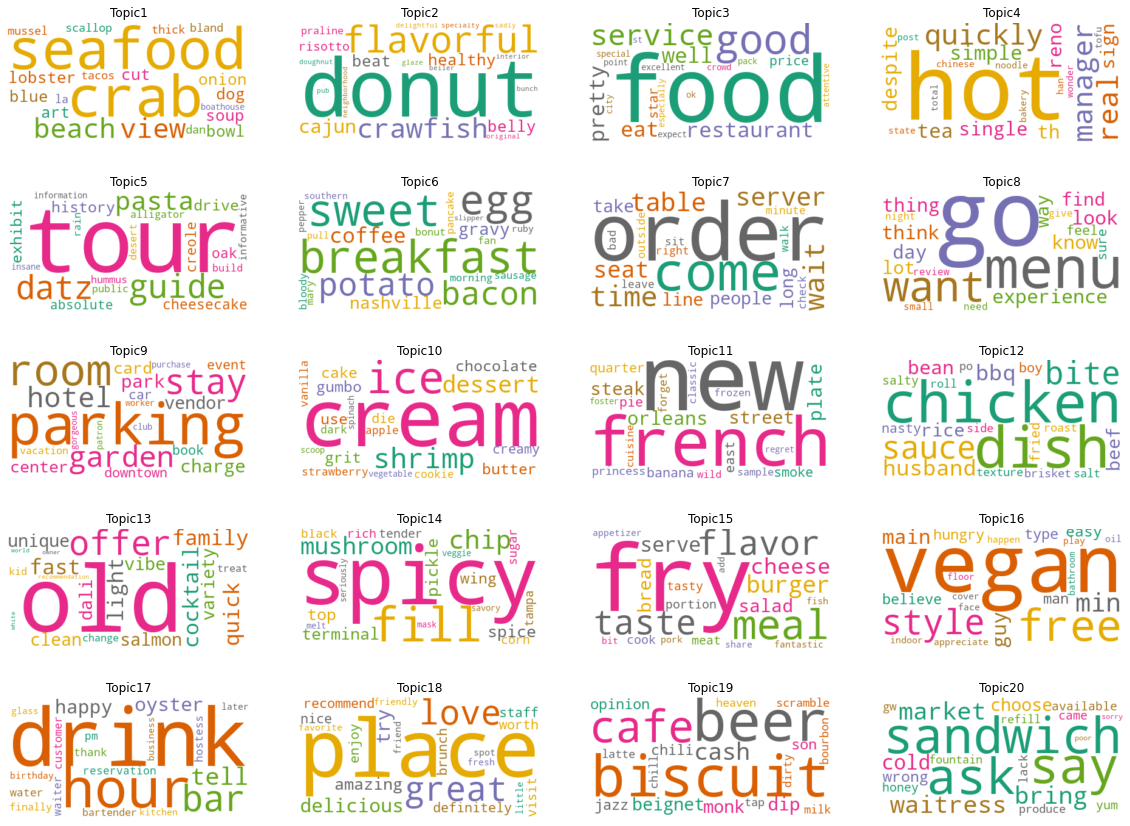

In [ ]:
# import wordclouds
from wordcloud import WordCloud

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(20):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

#### Dominant Topics for **each document**

In [ ]:
# create a dataframe
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_df["Category"] = data.category #category of the document, original dataset
corpus_topic_df["Dominant Topic"] = [item[0]+1 for item in corpus_topics]
corpus_topic_df["Contribution %"] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df["Topic Terms"] = [topics_df.iloc[t[0]]["Terms per Topic"] for t in corpus_topics]
corpus_topic_df.head()

,Category,Dominant Topic,Contribution %,Topic Terms
0,"['Beer', 'Wine & Spirits', 'Cafes', 'Coffee & Tea', 'Restaurants', 'Food', 'Breakfast & Brunch', 'American (New)']",18,20.12,"place, great, love, delicious, try, amazing, definitely, recommend, visit, nice, staff, enjoy, worth, brunch, friendly, spot, favorite, fresh, friend, little"
1,"['Ice Cream & Frozen Yogurt', 'Food', 'Local Flavor', 'Desserts']",18,16.81,"place, great, love, delicious, try, amazing, definitely, recommend, visit, nice, staff, enjoy, worth, brunch, friendly, spot, favorite, fresh, friend, little"
2,"['Cajun/Creole', 'Seafood', 'Restaurants', 'Breakfast & Brunch']",18,20.07,"place, great, love, delicious, try, amazing, definitely, recommend, visit, nice, staff, enjoy, worth, brunch, friendly, spot, favorite, fresh, friend, little"
3,"['Cocktail Bars', 'Nightlife', 'Gastropubs', 'Sports Bars', 'Restaurants', 'American (New)', 'Lounges', 'Bars']",15,19.60,"fry, meal, flavor, taste, burger, cheese, serve, salad, bread, portion, tasty, meat, cook, appetizer, fish, pork, fantastic, share, bit, add"
4,"['Event Planning & Services', 'Casinos', 'Beauty & Spas', 'Venues & Event Spaces', 'Arts & Entertainment', 'Day Spas', 'Hotels', 'Hotels & Travel']",16,29.68,"vegan, free, style, min, main, guy, easy, hungry, man, type, believe, appreciate, happen, indoor, play, cover, face, floor, bathroom, oil"


In [ ]:
corpus_topic_df.shape

(570438, 4)

#### Document counts for **each topic**

In [ ]:
dominant_topic_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

dominant_topic_df['Total_Docs_Perc'] = dominant_topic_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(corpus), 2))

dominant_topic_df

,Dominant Topic,Doc_Count,Total_Docs_Perc
0,1,314,0.06
1,2,98,0.02
2,3,9258,1.62
3,4,12,0.00
4,5,77,0.01
5,6,78,0.01
6,7,23737,4.16
7,8,233539,40.94
8,9,471,0.08
9,10,234,0.04


### **Optimal number of topics** - based on coherence measure

In [ ]:
import time

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

####  **Optimal topics range da 2 a 25**

In [ ]:
%%time 
model_list2, coherence_values2 = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=data_lemmatized, start=2, limit=26, step=2)


CPU times: user 3h 37min 20s, sys: 2min 10s, total: 3h 39min 30s
Wall time: 3h 39min 6s


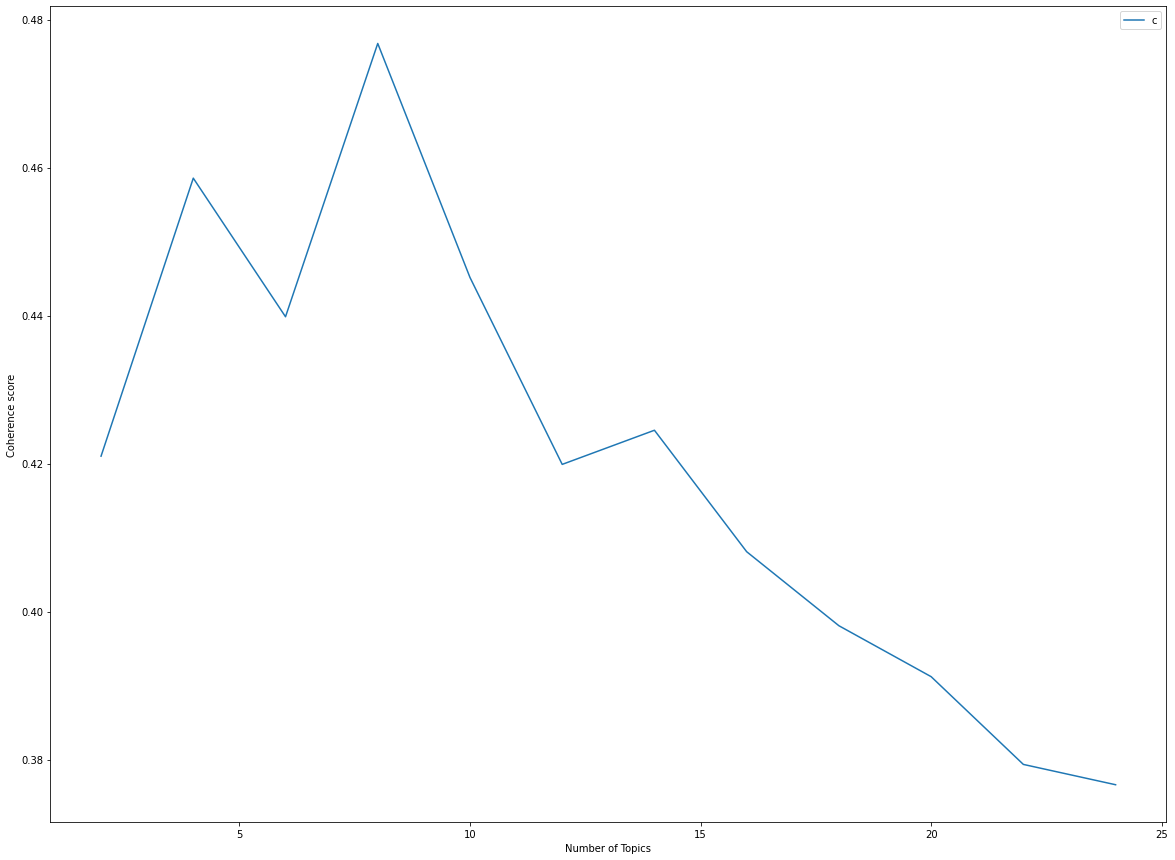

In [ ]:
# Show graph for topics from 2 to 25
limit=26; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values2)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
print(coherence_values2)

[0.42100970837628743, 0.4585837299072871, 0.43985192170721715, 0.4767879418843347, 0.4451623583162969, 0.41989920753786175, 0.42451297416415074, 0.40809683409220143, 0.39809292321852496, 0.39120899505160883, 0.37934945228766215, 0.37660320449434553]


In [ ]:
coh2 = [0.42100970837628743, 0.4585837299072871, 0.43985192170721715, 0.4767879418843347, 0.4451623583162969, 0.41989920753786175, 0.42451297416415074, 0.40809683409220143, 0.39809292321852496, 0.39120899505160883, 0.37934945228766215, 0.37660320449434553]

In [ ]:
x = [2,4,6,8,10,12,14,16,18,20,22,24]

In [ ]:
import matplotlib.pyplot as plt

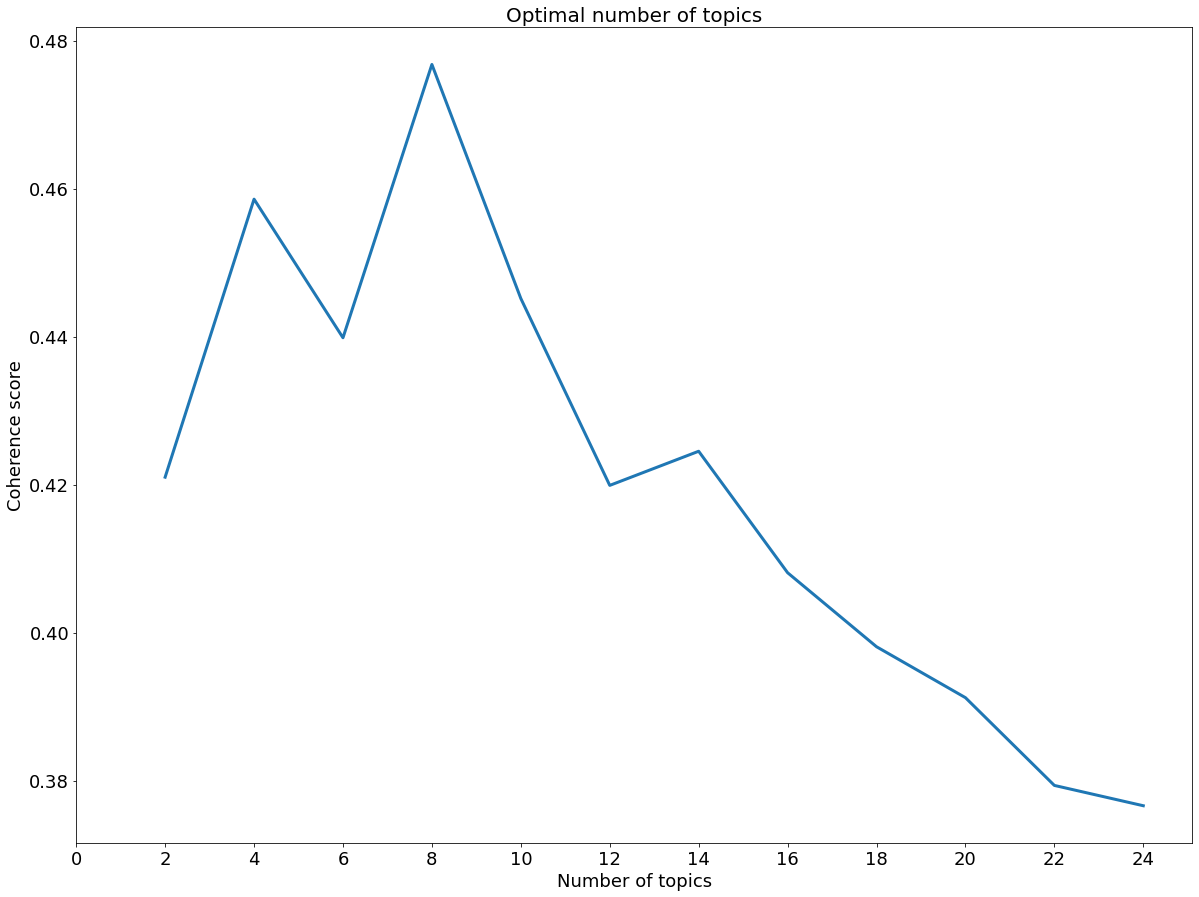

In [ ]:
plt.plot(x, coh2,  label = 'Optimal number of topics',  linewidth = 3,markersize = 20)
plt.title("Optimal number of topics", fontsize=20)
plt.xlabel("Number of topics", fontsize=18)
plt.ylabel("Coherence score", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(np.arange(26, step=2))
plt.savefig("/content/drive/MyDrive/Second year/Project Text Mining/yelp_dataset/topics.png")

### LDA with k = 8

In [ ]:
# Build LDA model
%%time
lda_model8 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics= 8, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto')

CPU times: user 11min 4s, sys: 6.67 s, total: 11min 11s
Wall time: 11min 18s


In [ ]:
# import pickle #save the model
# pickle.dump(lda_model8, open("drive/My Drive/Second year/Project Text Mining/yelp_dataset/lda_model8.pkl", "wb")) #8 topics


In [ ]:
#reload the model
lda_model8 = pickle.load(open("drive/My Drive/Second year/Project Text Mining/yelp_dataset/lda_model8.pkl", "rb"))

In [ ]:
# Print the Keyword in the 8 topics
pprint(lda_model8.print_topics())
doc_lda = lda_model8[corpus]

[(0,
  '0.045*"new" + 0.036*"shrimp" + 0.034*"oyster" + 0.029*"bread" + '
  '0.027*"orleans" + 0.021*"salad" + 0.021*"appetizer" + 0.020*"grit" + '
  '0.020*"nola" + 0.019*"fish"'),
 (1,
  '0.083*"donut" + 0.054*"parking" + 0.041*"view" + 0.036*"room" + '
  '0.025*"stay" + 0.018*"hotel" + 0.017*"park" + 0.014*"floor" + 0.014*"reno" '
  '+ 0.013*"center"'),
 (2,
  '0.036*"experience" + 0.030*"cream" + 0.028*"server" + 0.026*"ask" + '
  '0.025*"ice" + 0.018*"bring" + 0.017*"restaurant" + 0.016*"chocolate" + '
  '0.013*"year" + 0.013*"waiter"'),
 (3,
  '0.031*"biscuit" + 0.030*"flavor" + 0.028*"dish" + 0.028*"breakfast" + '
  '0.025*"brunch" + 0.022*"sweet" + 0.021*"egg" + 0.017*"perfect" + '
  '0.016*"french" + 0.015*"toast"'),
 (4,
  '0.039*"bar" + 0.032*"beer" + 0.026*"area" + 0.024*"tour" + 0.021*"market" + '
  '0.021*"location" + 0.020*"fun" + 0.017*"live" + 0.016*"city" + '
  '0.015*"cool"'),
 (5,
  '0.049*"chicken" + 0.040*"sandwich" + 0.040*"fry" + 0.035*"cheese" + '
  '0.025*"sau

In [ ]:
tm_results = lda_model8[corpus]

In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]


In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in lda_model8.show_topic(n, topn=10)] for n in range(0, lda_model8.num_topics)]


In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 11)], index=['Topic '+str(t) for t in range(1, lda_model8.num_topics+1)]).T


In [ ]:
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
Term1,new,donut,experience,biscuit,bar,chicken,food,order
Term2,shrimp,parking,cream,flavor,beer,sandwich,good,wait
Term3,oyster,view,server,dish,area,fry,place,time
Term4,bread,room,ask,breakfast,tour,cheese,great,like
Term5,orleans,stay,ice,brunch,market,sauce,service,get
Term6,salad,hotel,bring,sweet,location,hot,love,come
Term7,appetizer,park,restaurant,egg,fun,philly,try,go
Term8,grit,floor,chocolate,perfect,live,meat,delicious,table
Term9,nola,reno,year,french,city,vegan,amazing,want
Term10,fish,center,waiter,toast,cool,pork,definitely,hour


In [ ]:
pd.set_option('display.max_colwidth', -1)


<ipython-input-33-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, lda_model8.num_topics+1)] )
topics_df

,Terms per Topic
Topic1,"new, shrimp, oyster, bread, orleans, salad, appetizer, grit, nola, fish"
Topic2,"donut, parking, view, room, stay, hotel, park, floor, reno, center"
Topic3,"experience, cream, server, ask, ice, bring, restaurant, chocolate, year, waiter"
Topic4,"biscuit, flavor, dish, breakfast, brunch, sweet, egg, perfect, french, toast"
Topic5,"bar, beer, area, tour, market, location, fun, live, city, cool"
Topic6,"chicken, sandwich, fry, cheese, sauce, hot, philly, meat, vegan, pork"
Topic7,"food, good, place, great, service, love, try, delicious, amazing, definitely"
Topic8,"order, wait, time, like, get, come, go, table, want, hour"


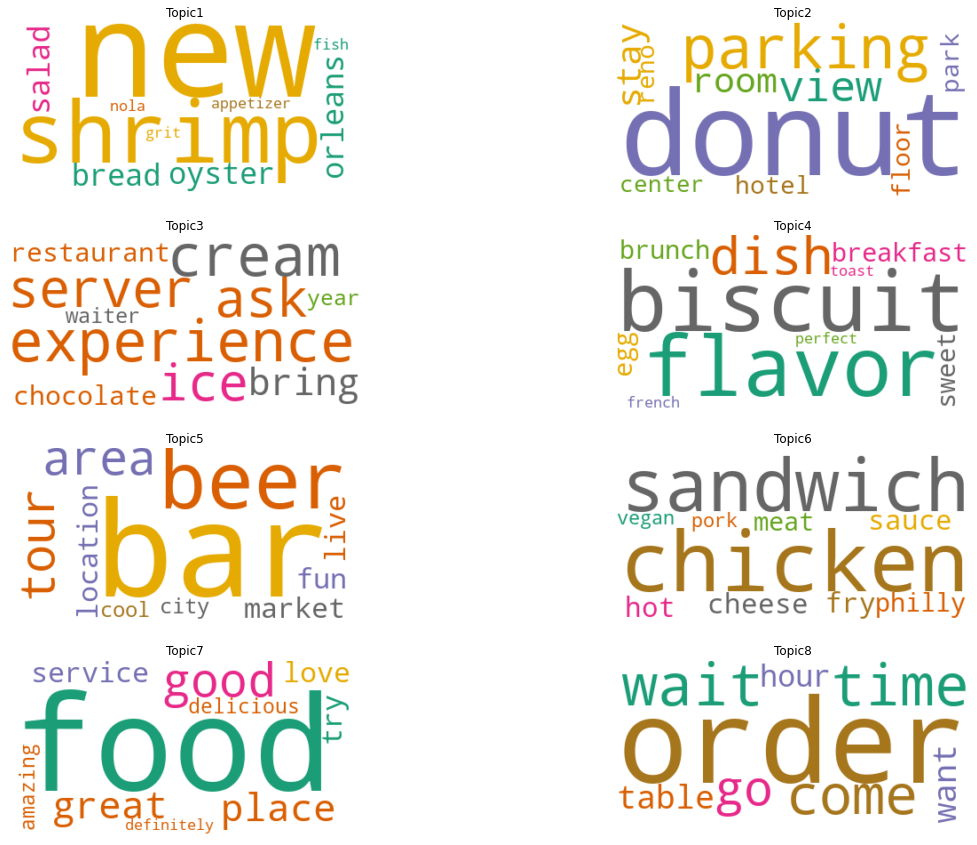

In [ ]:
# import wordclouds
from wordcloud import WordCloud

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(8):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(4, 2,i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])
    plt.savefig("/content/drive/MyDrive/Second year/Project Text Mining/yelp_dataset/wordcloud_topics.png")

plt.show()
#plt.savefig("/content/drive/MyDrive/Second year/Project Text Mining/yelp_dataset/wordcloud_topics.png")

In [ ]:
# create a dataframe
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_df["Category"] = data.category #category of the document, original dataset
corpus_topic_df["Dominant Topic"] = [item[0]+1 for item in corpus_topics]
corpus_topic_df["Contribution %"] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df["Topic Terms"] = [topics_df.iloc[t[0]]["Terms per Topic"] for t in corpus_topics]
corpus_topic_df.head()

,Category,Dominant Topic,Contribution %,Topic Terms
0,"['Beer', 'Wine & Spirits', 'Cafes', 'Coffee & Tea', 'Restaurants', 'Food', 'Breakfast & Brunch', 'American (New)']",7,40.93,"food, good, place, great, service, love, try, delicious, amazing, definitely"
1,"['Ice Cream & Frozen Yogurt', 'Food', 'Local Flavor', 'Desserts']",7,47.17,"food, good, place, great, service, love, try, delicious, amazing, definitely"
2,"['Cajun/Creole', 'Seafood', 'Restaurants', 'Breakfast & Brunch']",7,43.05,"food, good, place, great, service, love, try, delicious, amazing, definitely"
3,"['Cocktail Bars', 'Nightlife', 'Gastropubs', 'Sports Bars', 'Restaurants', 'American (New)', 'Lounges', 'Bars']",7,37.66,"food, good, place, great, service, love, try, delicious, amazing, definitely"
4,"['Event Planning & Services', 'Casinos', 'Beauty & Spas', 'Venues & Event Spaces', 'Arts & Entertainment', 'Day Spas', 'Hotels', 'Hotels & Travel']",2,28.72,"donut, parking, view, room, stay, hotel, park, floor, reno, center"


In [ ]:
dominant_topic_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

dominant_topic_df['Total_Docs_Perc'] = dominant_topic_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(corpus), 2))

dominant_topic_df

,Dominant Topic,Doc_Count,Total_Docs_Perc
0,1,2148,0.38
1,2,1078,0.19
2,3,1048,0.18
3,4,2687,0.47
4,5,915,0.16
5,6,6931,1.22
6,7,397521,69.69
7,8,158110,27.72


In [ ]:
# Compute Coherence Score
coherence_model_lda8 = CoherenceModel(model=lda_model8, texts=data_lemmatized, dictionary=dictionary, coherence='c_v') #coherence 4 con topics 10
coherence_lda8 = coherence_model_lda8.get_coherence()
print('\nCoherence Score for k = 8: ', coherence_lda8)


Coherence Score for k = 8:  0.4767879418843347


In [ ]:
print('\nPerplexity Score for k = 8: ', lda_model8.log_perplexity(corpus))  # a measure of how good the model is. lower the better. /-0.7 con topics 10



Perplexity Score for k = 8:  -7.344147862233043
